In [37]:
#import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


In [38]:
# importing our Dataset into our Google Colaboratory home


df = pd.read_csv("/content/Retailer_data.csv")

In [39]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,BevCo,1185732,1/1/2022,Northeast,New York,New York,Coca-Cola,0.50,"12,000",6000.0,3000.00,0.50
1,BevCo,1185732,1/2/2022,Northeast,New York,New York,Diet Coke,0.50,"10,000",5000.0,1500.00,0.30
2,BevCo,1185732,1/3/2022,Northeast,New York,New York,Sprite,0.40,"10,000",4000.0,1400.00,0.35
3,BevCo,1185732,1/4/2022,Northeast,New York,New York,Fanta,0.45,"8,500",3825.0,1338.75,0.35
4,BevCo,1185732,1/5/2022,Northeast,New York,New York,Powerade,0.60,"9,000",5400.0,1620.00,0.30


In [40]:
df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
9643,BevCo,1185732,1/24/2023,Northeast,New Hampshire,Manchester,Powerade,0.50,640,320.0,89.60,0.28
9644,BevCo,1185732,1/24/2023,Northeast,New Hampshire,Manchester,Dasani Water,0.41,"1,050",430.5,137.76,0.32
9645,BevCo,1185732,2/22/2023,Northeast,New Hampshire,Manchester,Coca-Cola,0.41,"1,840",754.4,279.13,0.37
9646,BevCo,1185732,2/22/2023,Northeast,New Hampshire,Manchester,Diet Coke,0.42,700,294.0,123.48,0.42
9647,BevCo,1185732,2/22/2023,Northeast,New Hampshire,Manchester,Sprite,0.29,830,240.7,64.99,0.27


In [41]:
# Getting a brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Beverage Brand    9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   object 
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 904.6+ KB


In [42]:
df.describe()

,Retailer ID,Price per Unit,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,0.452166,1245.508396,489.479746,0.422991
std,2.636038e+04,0.147054,1271.639211,486.646496,0.097197
min,1.128299e+06,0.070000,0.000000,0.000000,0.100000
25%,1.185732e+06,0.350000,406.525000,175.347500,0.350000
50%,1.185732e+06,0.450000,780.350000,326.300000,0.410000
75%,1.185732e+06,0.550000,1586.450000,619.235000,0.490000
max,1.197831e+06,1.100000,8250.000000,3900.000000,0.800000


#**Taking out irregularities**

In [43]:
#The entire Dataset with the total of 9648 rows and 12 columns has no null value

In [44]:
#Checking for null values
# The code returns true if the row is null  or balank or returns false

In [45]:
df.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Beverage Brand,0
Price per Unit,0
Units Sold,0
Total Sales,0


#There's no values missing in this case

In [46]:
#      SUMMARY STATISTIC

# This provides a quick summary of data and
#are useful for comparing different data sets.It compares one project to another

In [47]:
df.describe()

,Retailer ID,Price per Unit,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,0.452166,1245.508396,489.479746,0.422991
std,2.636038e+04,0.147054,1271.639211,486.646496,0.097197
min,1.128299e+06,0.070000,0.000000,0.000000,0.100000
25%,1.185732e+06,0.350000,406.525000,175.347500,0.350000
50%,1.185732e+06,0.450000,780.350000,326.300000,0.410000
75%,1.185732e+06,0.550000,1586.450000,619.235000,0.490000
max,1.197831e+06,1.100000,8250.000000,3900.000000,0.800000


In [48]:
# Correlation
df[["Retailer ID", "Price per Unit", "Total Sales", "Operating Profit", "Operating Margin"]].corr()

,Retailer ID,Price per Unit,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.391684,-0.138713,-0.062415,0.216780
Price per Unit,-0.391684,1.000000,0.539547,0.503683,-0.137486
Total Sales,-0.138713,0.539547,1.000000,0.935372,-0.302295
Operating Profit,-0.062415,0.503683,0.935372,1.000000,-0.047491
Operating Margin,0.216780,-0.137486,-0.302295,-0.047491,1.000000


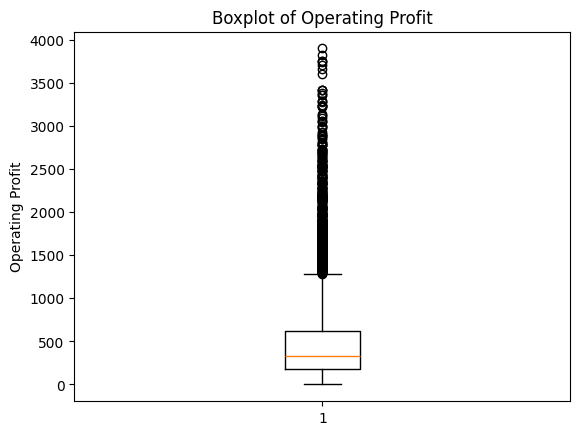

In [49]:

plt.boxplot(df["Operating Profit"])
plt.title("Boxplot of Operating Profit")
plt.ylabel("Operating Profit")
plt.show()

In [50]:

# Let's remove outliers for "Operating Profit" column

# Step 1 : calculate 25th and 75th percentiles
Q1 = df["Operating Profit"].quantile(0.25)
Q3 = df["Operating Profit"].quantile(0.75)

print(Q1, Q3)

# Step 2: Calculate Interquartile Range

IQR = Q3 - Q1

print(IQR)

# Step 3: calculate upper andlower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound, lower_bound)

# Step 4: Floor outliers (replace outlier values with upper_bound and low_bound values)

# flooring outliers above upper bound
df["Operating Profit"] = np.where(df["Operating Profit"] > upper_bound, upper_bound, df["Operating Profit"])

# flooring outliers below lower bound
df["Operating Profit"] = np.where(df["Operating Profit"] < lower_bound, lower_bound, df["Operating Profit"])


175.34750000000003 619.235
443.8875
1285.0662499999999 -490.48374999999993


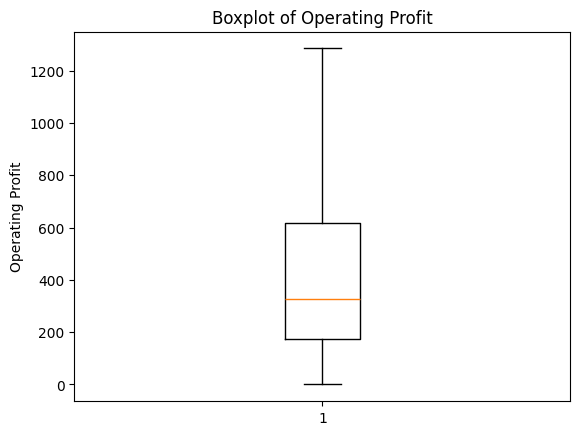

In [51]:
plt.boxplot(df["Operating Profit"])
plt.title("Boxplot of Operating Profit")
plt.ylabel("Operating Profit")
plt.show()






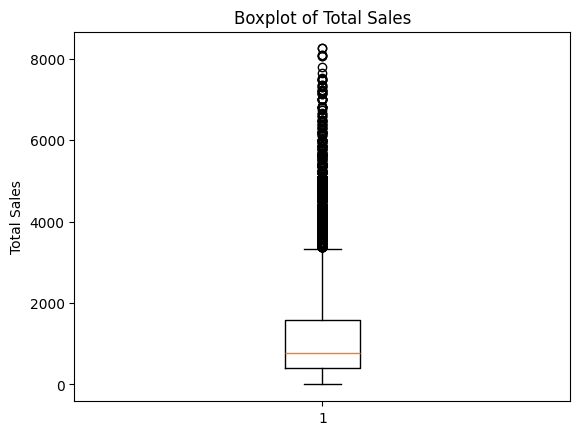

In [52]:
plt.boxplot(df["Total Sales"])
plt.title("Boxplot of Total Sales")
plt.ylabel("Total Sales")
plt.show()

In [53]:
# Let's remove outliers for "Total Sales" column

# Step 1 : calculate 25th and 75th percentiles
Q1 = df["Total Sales"].quantile(0.25)
Q3 = df["Total Sales"].quantile(0.75)

print(Q1, Q3)

# Step 2: Calculate Interquartile Range

IQR = Q3 - Q1

print(IQR)

# Step 3: calculate upper andlower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound, lower_bound)

# Step 4: Floor outliers (replace outlier values with upper_bound and low_bound values)

# flooring outliers above upper bound
df["Total Sales"] = np.where(df["Total Sales"] > upper_bound, upper_bound, df["Total Sales"])

# flooring outliers below lower bound
df["Total Sales"] = np.where(df["Total Sales"] < lower_bound, lower_bound, df["Total Sales"])

406.525 1586.45
1179.9250000000002
3356.3375000000005 -1363.3625000000002


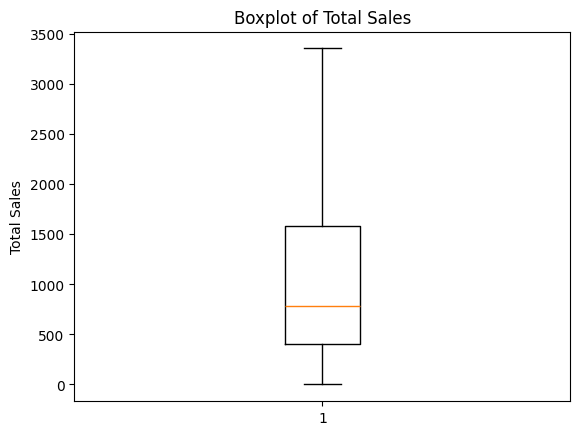

In [54]:
plt.boxplot(df["Total Sales"])
plt.title("Boxplot of Total Sales")
plt.ylabel("Total Sales")
plt.show()

In [55]:
# Correlation
df[["Total Sales", "Operating Profit"]].corr()

,Total Sales,Operating Profit
Total Sales,1.000000,0.954296
Operating Profit,0.954296,1.000000


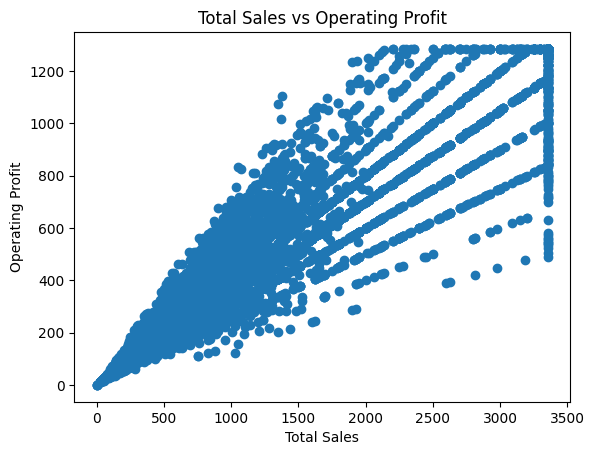

In [56]:
# pLOTTING A SCATTERPLOT OF "Total Sales" AGAINST "Operating Profit"

plt.scatter(df["Total Sales"], df["Operating Profit"])
plt.title("Total Sales vs Operating Profit")
plt.xlabel("Total Sales")
plt.ylabel("Operating Profit")
plt.show()

#**SPLITTING THE DATA INTO TRAINING AND TEST SETS**

Splitting the data ensures you have a separate set to test the model's performance after training it on the training set. Before splitting, we will assign a new variable and trim the dataframe to the relevant coulmns (Total Sales) and (Operating Profit). The trimmed data is then divided first into feature matrix and target vector, the data is then vertically divided into training and testing data.

In [57]:
# trimming the data to the relevant columns

In [58]:
model_df = df[["Operating Profit", "Total Sales"]]
model_df

,Operating Profit,Total Sales
0,1285.06625,3356.3375
1,1285.06625,3356.3375
2,1285.06625,3356.3375
3,1285.06625,3356.3375
4,1285.06625,3356.3375
...,...,...
9643,89.60000,320.0000
9644,137.76000,430.5000
9645,279.13000,754.4000
9646,123.48000,294.0000


In [59]:
# divide data into feature matrix and target vector,

feature = ["Total Sales"]
target = "Operating Profit"

X = model_df[feature]
y = model_df[target]

In [60]:
# dividing data into training and testing data

# X_train  --- 1st 7 rows larger chunk , X_test
# y_train --  --- 1st 7 rows larger chunk;  y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

      Total Sales
3542    1100.0000
3400    1375.0000
30      3356.3375
6447     657.6000
9261     346.0000
...           ...
5734     190.0000
5191     198.0000
5390    1255.8000
860     1662.5000
7270     225.7000

[7718 rows x 1 columns]       Total Sales
2997    2000.0000
7903    1001.9000
4012     902.4000
2392    2925.0000
3284    1200.0000
...           ...
3578    1925.0000
9371      70.4000
4684     140.0000
6414      97.2000
604     3356.3375

[1930 rows x 1 columns] 3542     385.00000
3400     481.25000
30      1285.06625
6447     348.53000
9261     162.62000
           ...    
5734      95.00000
5191      51.48000
5390     803.71000
860      748.13000
7270     103.82000
Name: Operating Profit, Length: 7718, dtype: float64 2997     700.00000
7903     541.03000
4012     424.13000
2392    1023.75000
3284     480.00000
           ...    
3578     673.75000
9371      29.57000
4684      58.80000
6414      50.54000
604     1285.06625
Name: Operating Profit, Length: 1930, dtype: fl

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7718, 1) (1930, 1) (7718,) (1930,)


**CREATE MODEL AND EVALUATE ITS PERFORMANCE**

**BASELINING**

In [62]:
# Let's create a baseline model
# baseline_model=

y_train_mean = y_train.mean()
y_train_mean

451.06305730111427

In [63]:
# let's create predictions using the baseline model
#baseline_pred =

y_train_pred = [y_train_mean] * len(y_test)
len(y_train_pred)

1930

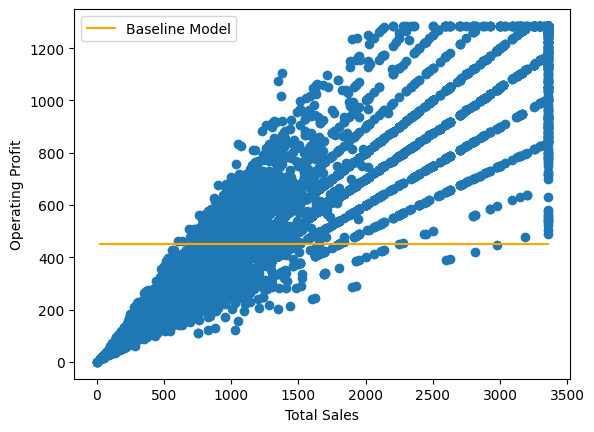

In [64]:
# visualising the baseline on a scatterplot

plt.plot(X_test.values, y_train_pred, color="orange", label="Baseline Model")
plt.scatter(X, y)
plt.xlabel("Total Sales")
plt.ylabel("Operating Profit")
plt.legend()

**EVALUATING BASELINE PERFORMANCE**

Mean absolute error evaluation metrics is employed



In [67]:
 #MAE FOR baseline model

baseline_mae = mean_absolute_error(y_test, y_train_pred)

print("The mean value of y_train values is:", round(y_train_mean, 2))
print("The MAE for the baseline model is:", round(baseline_mae, 2))

The mean value of y_train values is: 451.06
The MAE for the baseline model is: 290.09


**BUILD AND EVALUATE MODEL**

In [68]:
# let's ctreate a linear regression model

model = LinearRegression()
model

LinearRegression()

**Model Fitting/Training**

In [69]:
model.fit(X_train, y_train)

LinearRegression()

**Test Model with Training Data**

In [70]:
# we'd generate predictions using X-train

model_pred_train = model.predict(X_train)

model_pred_train

array([ 434.68590897,  531.07802353, 1225.57006456, ...,  489.29642332,
        631.85159784,  128.22908802])

**Evaluate Model Performance 1**

In [71]:
# calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model_pred_train)

round(model_train_mae, 2)

71.69

**Comparing baseline MAE with Model Training MAE**

In [72]:
# print baseline and model(train) MAE to compare both

print ("The baseline MAE is:\t\t", round(baseline_mae, 2))
print ("The model (train) MAE is:\t", round(model_train_mae, 2))

The baseline MAE is:		 290.09
The model (train) MAE is:	 71.69


**Test Model with Testing Data**

In [73]:
# model generates predictions off X_test Values

model_test_pred = model.predict(X_test)
model_test_pred

array([ 750.15101117,  400.30021283,  365.42379319, ...,   98.18979995,
         83.18768176, 1225.57006456])

**Evaluate Model Performance II**

In [74]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

69.449

**Compare Baselining MAE, Model Testing and Model Training MAE**


[ ]


In [76]:
#print baselining model(train) and model (test) MAE'S to compare thethree of them

print("The baseling MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))
print("The model (test) MAE is:\t", round(model_test_mae, 2))

The baseling MAE is:		 290.09
The model (train) MAE is:	 71.69
The model (test) MAE is:	 69.45


**REPORT MODEL PERFORMANCE**

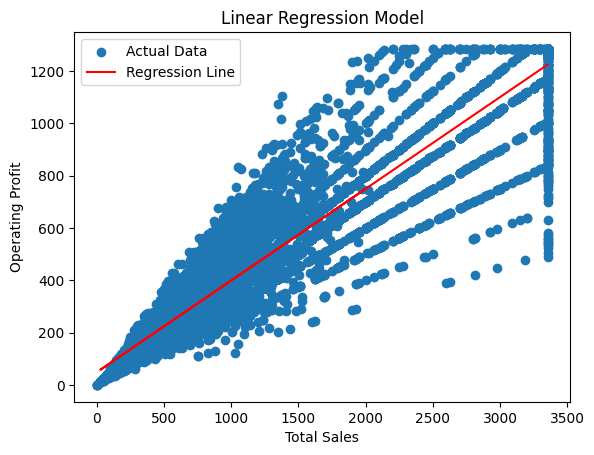

In [77]:
# Plot the actual data points
plt.scatter(X, y, label='Actual Data')

# Plot the regression line
plt.plot(X_test, model_test_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.title('Linear Regression Model')

# Display the legend
plt.legend()

# Show the plot
plt.show()



The regression line suggests that as the "Total Sales" increase, the "Operating Profit" is also likely to increase. This means that retailers with higher total sales tend to have higher operating profits.

